# Welcome to my project

### here's a description of my project

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import seaborn as sns
import pylab as plot

In [4]:
# Import dataframe that I'm working with
# Sourced from: 
df_value = pd.read_csv("HackRankDataset.csv")

/Users/ericasanchez/Envs/clustering/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# Created a new dataframe with only gender and languages
df = df_value[['q3Gender', 'q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython', 'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo', 'q25LangSwift', 'q25LangR']]

# Renamed the columns to easily work with
df.columns = ['Gender', 'C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

In [21]:
df.head()

,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN


In [33]:
# Split the dataframe by gender
female = df[df['Gender'] == 'Female'].drop(columns='Gender')
male = df[df['Gender'] == 'Male'].drop(columns='Gender')

In [51]:
female.head()

,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
2,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
4,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN
13,NaN,Will Learn,Know,Know,Know,Know,Will Learn,Will Learn,NaN,NaN
14,NaN,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,NaN,NaN,NaN


In [90]:
# "Melt" languages columns together by language and value
# This helps using the Seaborn countplot function by plotting the "variable" on the x-axis and "value" on the y-axis
female_melt = pd.melt(female)
male_melt = pd.melt(male)

In [91]:
# Drop all "NaN" values
female_melt.dropna(subset=['value'], inplace=True)
male_melt.dropna(subset=['value'], inplace=True)

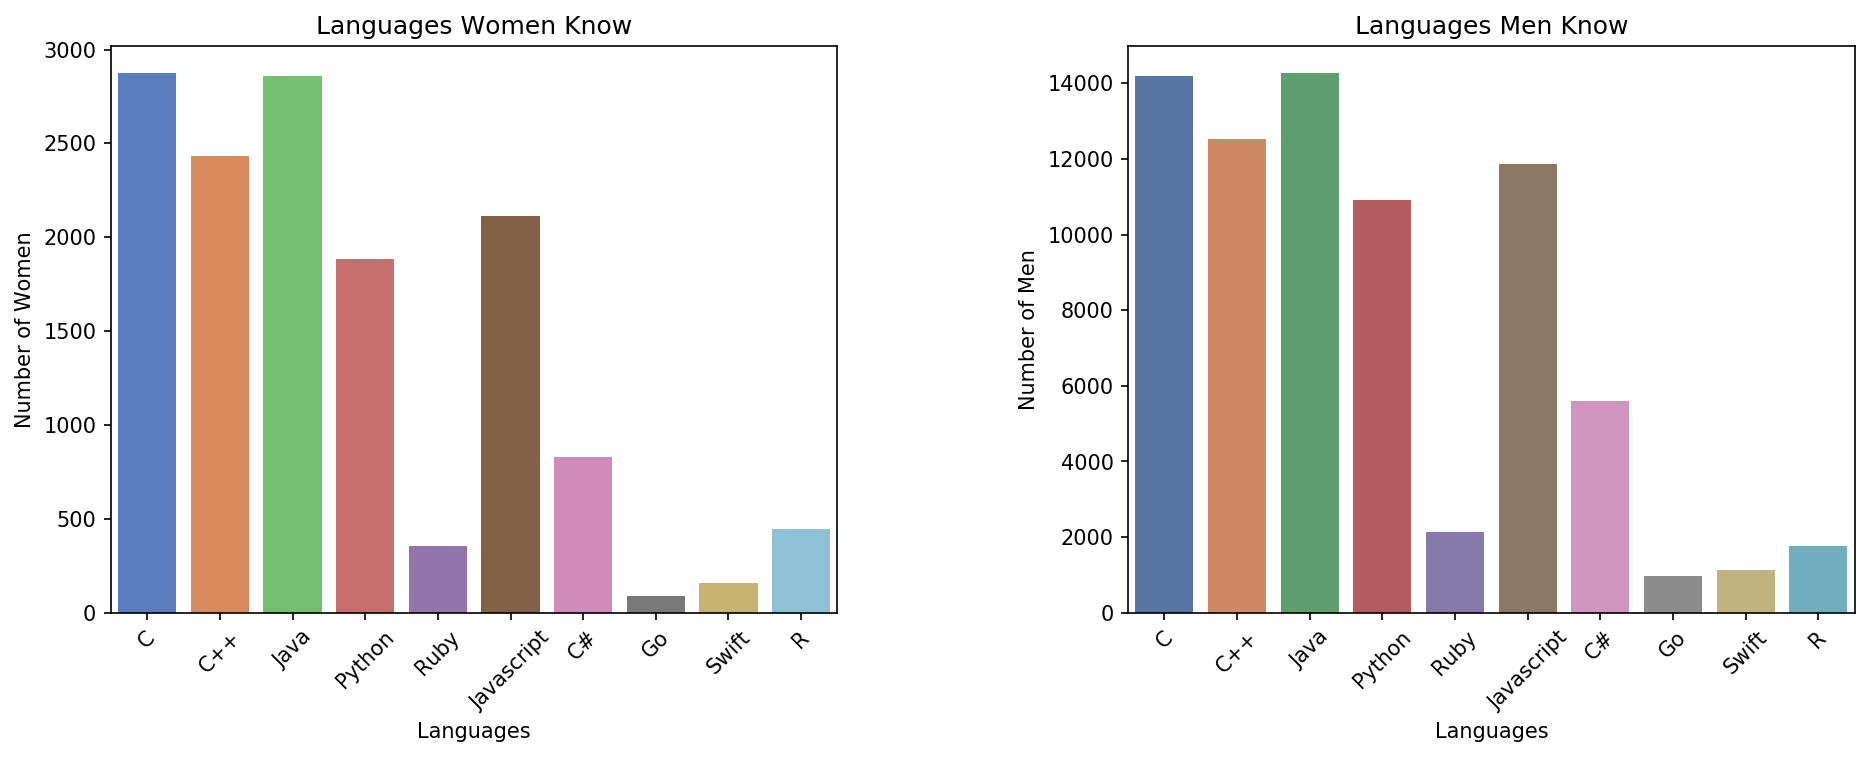

In [92]:
# Languages Known By Gender

fig1 = plt.figure(dpi=150)
fig1.set_figheight(5)
fig1.set_figwidth(15)
sns.set_palette("muted")
fig1.subplots_adjust(hspace=0, wspace=0.4)

# Women Known
plt.subplot(1, 2, 1)
chart1 = sns.countplot(data=female_melt[female_melt['value'] == 'Know'], x="variable")
plt.title("Languages Women Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")


# Men Known
plt.subplot(1, 2, 2)
chart2 = sns.countplot(data=male_melt[male_melt['value'] == 'Know'], x="variable")
plt.title("Languages Men Know")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
sns.set_palette("deep")


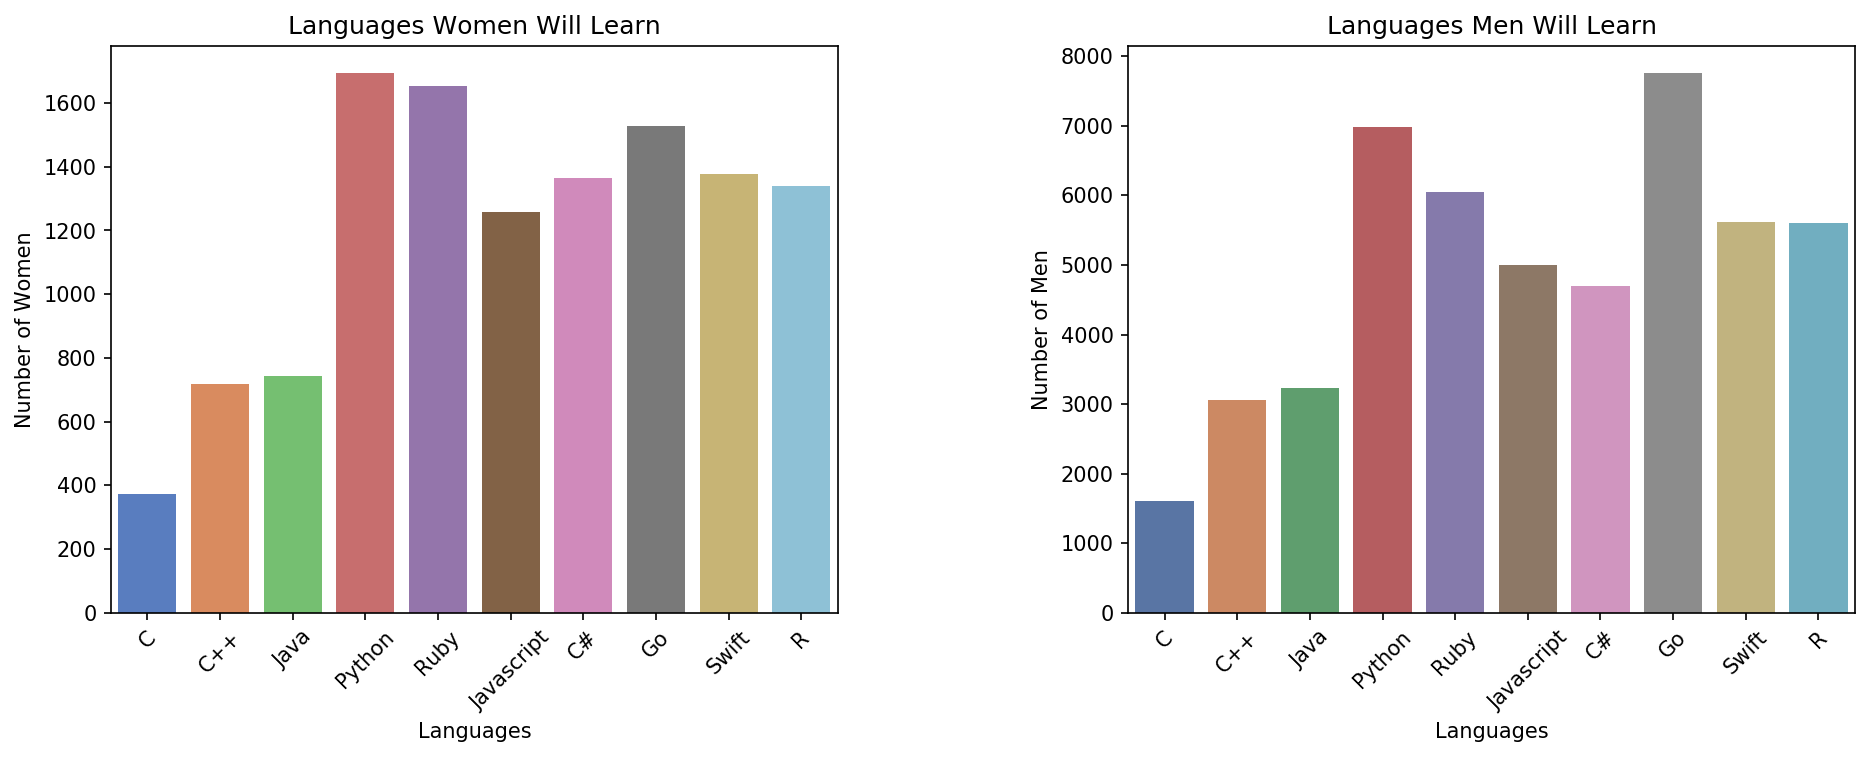

In [93]:
# Languages will Learn by Gender

fig1 = plt.figure(dpi=150)
fig1.set_figheight(5)
fig1.set_figwidth(15)
sns.set_palette("muted")
fig1.subplots_adjust(hspace=0, wspace=0.4)

# Women Will Learn
plt.subplot(1, 2, 1)
chart1 = sns.countplot(data=female_melt[female_melt['value'] == 'Will Learn'], x="variable")
plt.title("Languages Women Will Learn")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")


# Men Will Learn
plt.subplot(1, 2, 2)
chart2 = sns.countplot(data=male_melt[male_melt['value'] == 'Will Learn'], x="variable")
plt.title("Languages Men Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
sns.set_palette("deep")

In [100]:
# Pie chart showing percentage of Men and Women who know which language

In [112]:
language = ['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

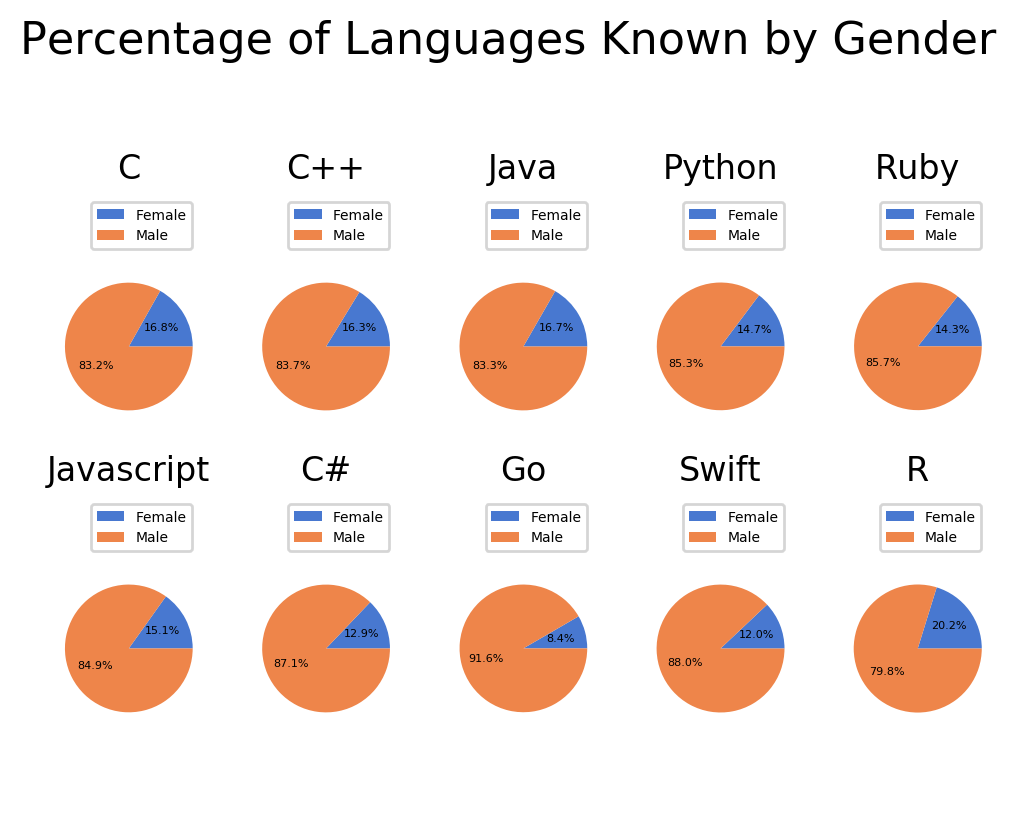

In [115]:
fig2 = plt.figure(dpi=200)
sns.set_palette("muted")
fig2.subplots_adjust(hspace=0, wspace=0.4)
fig2.suptitle('Percentage of Languages Known by Gender', fontsize=16, y=1.1)

subindex = 1
for element in language:
    plt.subplot(2, 5, subindex)
    plt.pie([
        df[(df[element]=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df[element]=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

    plt.axis('equal')
    plt.legend(df['Gender'], loc=1, prop={'size': 5})
    plt.title(element)
    subindex = subindex + 1
    
    
    

Text(0.5,1,'R')

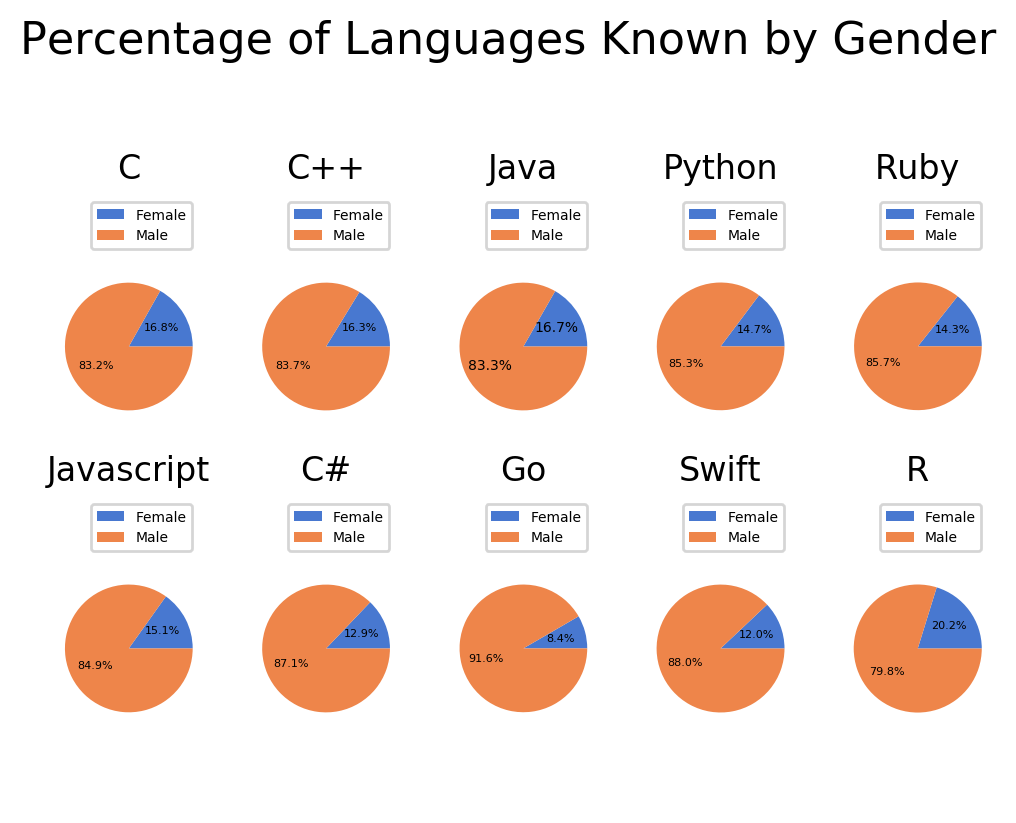

In [97]:
fig2 = plt.figure(dpi=200)
sns.set_palette("muted")
fig2.subplots_adjust(hspace=0, wspace=0.4)
fig2.suptitle('Percentage of Languages Known by Gender', fontsize=16, y=1.1)


# C Pie Chart
plt.subplot(2, 5, 1)
plt.pie([
        df[(df['C']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['C']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('C')

# C++ Pie Chart
plt.subplot(2, 5, 2)
plt.pie([
        df[(df['C++']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['C++']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('C++')

# Java Pie Chart
plt.subplot(2, 5, 3)
plt.pie([
        df[(df['Java']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Java']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 5})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Java')


# Python Pie Chart
plt.subplot(2, 5, 4)
plt.pie([
        df[(df['Python']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Python']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Python')

# Ruby
plt.subplot(2, 5, 5)
plt.pie([
        df[(df['Ruby']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Ruby']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Ruby')

# Javascript
plt.subplot(2, 5, 6)
plt.pie([
        df[(df['Javascript']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Javascript']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Javascript')

# C#
plt.subplot(2, 5, 7)
plt.pie([
        df[(df['C#']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['C#']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('C#')

# Go
plt.subplot(2, 5, 8)
plt.pie([
        df[(df['Go']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Go']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Go')

# Swift
plt.subplot(2, 5, 9)
plt.pie([
        df[(df['Swift']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['Swift']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('Swift')

# R Pie Chart
plt.subplot(2, 5, 10)
plt.pie([
        df[(df['R']=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df['R']=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})
plt.axis('equal')
plt.legend(df['Gender'], loc=1, prop={'size': 5})
plt.title('R')